In [1]:
#MC valuation of european call option with NumPy

In [2]:
import math
import numpy as np
from time import time

In [3]:
np.random.seed(20000)
t0 = time()
# parameters
S0 = 100.
K = 105.
T=1.0
r=0.05
sigma = 0.2
M = 50 # number of time steps
dt = T/M # length of time interval
I = 250000 # number of paths

# simulating I paths with M time steps
S = np.zeros((M+1 , I))
S[0] = S0
for t in range(1,M+1):
    z = np.random.standard_normal(I)
    #vectorized op per time step over all paths
    S[t] = S[t-1] * np.exp((r - 0.5*sigma**2)*dt + sigma*math.sqrt(dt)*z)
    
#calculating MC estimator
C0 = math.exp(-r*T)*np.sum(np.maximum(S[-1] - K ,0)) / I

tnp1 = time() - t0

print "European Option Value %7.3f" %C0
print "Duration in Seconds %7.3f" %tnp1

European Option Value   8.037
Duration in Seconds   0.864


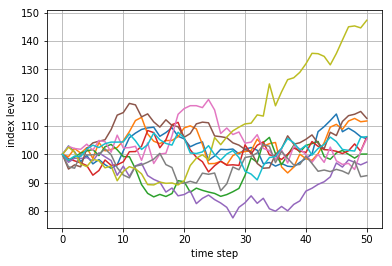

In [8]:
import matplotlib.pyplot as plt
#first 10 simulated paths over all time steps
#??index level?
plt.plot(S[:, :10])
plt.grid(True)
plt.xlabel('time step')
plt.ylabel('index level')
plt.show()




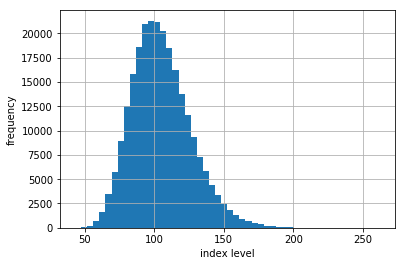

In [5]:
#frequency of ?simulated index levels at the end of the simulation period
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.show()

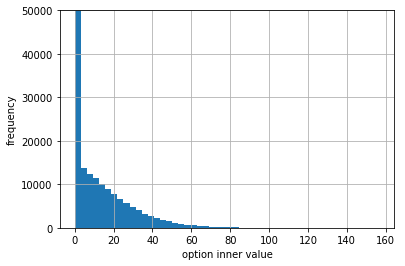

In [6]:
#??
# option's end of period (maturity) inner values
#Eur call option expires worthless in a significant amount of cases
plt.hist(np.maximum(S[-1] - K, 0), bins=50)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')
plt.ylim(0, 50000)
plt.show()

In [7]:
#??
sum(S[-1] < K)

133958